#  Intro to the Dataset and the Aim
<img src="loantap_logo.png" alt="LoanTap logo banner" style="width: 800px;"/>

**Problem Statement**: LoanTap, an online platform offering customized loan products, is facing challenges in efficiently assessing the creditworthiness of loan applicants. By predicting the likelihood of default, the company aims to minimize risks and improve the decision-making process for loan approvals.

**Objective**: The goal is to develop a machine learning model that can predict whether an applicant will default on a personal loan, based on their financial and credit history attributes. The model should help LoanTap make data-driven decisions, reducing the overall risk of default.

**Dataset Overview**: LoanTap has provided a dataset containing various financial and credit-related features for loan applicants. Below is a summary of the dataset:

| Column               | Description                                                        |
|----------------------|--------------------------------------------------------------------|
| loan_amnt            | The loan amount applied for by the borrower                        |
| term                 | Loan term in months (36 or 60)                                     |
| int_rate             | Interest rate on the loan                                          |
| installment          | Monthly payment owed if the loan originates                        |
| grade                | LoanTap assigned grade                                             |
| sub_grade            | LoanTap assigned subgrade                                          |
| emp_title            | Job title supplied by the borrower                                 |
| emp_length           | Employment length in years (0-10)                                  |
| home_ownership       | Home ownership status                                              |
| annual_inc           | Self-reported annual income                                        |
| verification_status  | Income verification status (verified/not verified)                 |
| issue_d              | Date the loan was funded                                           |
| loan_status          | Target variable (current loan status: default or not)              |
| purpose              | Purpose of the loan                                                |
| dti                  | Debt-to-income ratio                                               |
| earliest_cr_line     | Month the borrower’s earliest credit line was opened               |
| open_acc             | Number of open credit lines                                        |
| pub_rec              | Number of derogatory public records                                |
| revol_bal            | Total revolving credit balance                                     |
| revol_util           | Revolving line utilization rate                                    |
| total_acc            | Total number of credit lines                                       |
| initial_list_status  | The initial listing status of the loan. Possible values are – W, F |
| pub_rec              | Number of derogatory public records                                |
| application_type     | Individual or joint application                                    |
| mort_acc             | Number of mortgage accounts                                        |
| pub_rec_bankruptcies | Number of public record bankruptcies                               |
| address              | Address of the individual                                          |

**Aim**

1. To analyze which factors are critical in determining whether a borrower will default on a personal loan.
2. To develop a predictive model that estimates the likelihood of loan default based on borrower attributes.
3. Ensure interpretability of the model so LoanTap can understand the key drivers of defaults.

**Methods and Techniques used:** EDA, feature engineering, modeling using sklearn pipelines, hyperparameter tuning

**Measure of Performance and Minimum Threshold to reach the business objective** : Since both recall and precision are important, we will use maximize f1 score.

**Assumptions**
* The dataset is assumed to be representative of LoanTap’s entire customer base.
* The data remains stable over time, and thus, the model is assumed not to decay rapidly.
* External factors (e.g., economic downturns) are not considered, though they could influence loan repayment behavior.

## Library Setup

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd


# Visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Helper libraries
from tqdm.notebook import tqdm, trange # Progress bar
import warnings 
#warnings.filterwarnings('ignore') # ignore all warkings

# To not cache lib import (.py modification won't refelect unless kernal restarts)
#%load_ext autoreload
#%autoreload 2

# Visual setup
%config InlineBackend.figure_format = 'retina' # sets the figure format to 'retina' for high-resolution displays.

# Pandas options
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # display all interaction 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)

# Table styles
table_styles = {
    'cerulean_palette': [
        dict(selector="th", props=[("color", "#FFFFFF"), ("background", "#004D80")]),
        dict(selector="td", props=[("color", "#333333")]),
        dict(selector="table", props=[("font-family", 'Arial'), ("border-collapse", "collapse")]),
        dict(selector='tr:nth-child(even)', props=[('background', '#D3EEFF')]),
        dict(selector='tr:nth-child(odd)', props=[('background', '#FFFFFF')]),
        dict(selector="th", props=[("border", "1px solid #0070BA")]),
        dict(selector="td", props=[("border", "1px solid #0070BA")]),
        dict(selector="tr:hover", props=[("background", "#80D0FF")]),
        dict(selector="tr", props=[("transition", "background 0.5s ease")]),
        dict(selector="th:hover", props=[("font-size", "1.07rem")]),
        dict(selector="th", props=[("transition", "font-size 0.5s ease-in-out")]),
        dict(selector="td:hover", props=[('font-size', '1.07rem'),('font-weight', 'bold')]),
        dict(selector="td", props=[("transition", "font-size 0.5s ease-in-out")])
    ]
}


import sys
import os
# Get the path to the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..')) # root dir of project

# Add the parent directory to the system path (can import from anywhere)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from loantap_credit_default_risk_model import config # custom config data for this project
    


# Seed value for numpy.random => makes notebooks stable across runs
np.random.seed(config.RANDOM_SEED)

## Data Ingestion

In [2]:
from loantap_credit_default_risk_model import data_handling as dh
    
df = dh.load_data_and_sanitize(config.FILE_NAME)

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
display(df.head(10).style.set_table_styles(table_styles['cerulean_palette']).set_caption("DF"))
df.info()
df.describe()

/tmp/ipykernel_1273084/792396875.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.000000,36 months,11.440000,329.480000,B,B4,Marketing,10+ years,RENT,117000.000000,Not Verified,2015-01-01 00:00:00,Fully Paid,vacation,Vacation,26.240000,1990-06-01 00:00:00,16.000000,0.000000,36369.000000,41.800000,25.000000,w,INDIVIDUAL,0.000000,0.000000,"0174 Michelle Gateway Mendozaberg, OK 22690"
1,8000.000000,36 months,11.990000,265.680000,B,B5,Credit analyst,4 years,MORTGAGE,65000.000000,Not Verified,2015-01-01 00:00:00,Fully Paid,debt_consolidation,Debt consolidation,22.050000,2004-07-01 00:00:00,17.000000,0.000000,20131.000000,53.300000,27.000000,f,INDIVIDUAL,3.000000,0.000000,"1076 Carney Fort Apt. 347 Loganmouth, SD 05113"
2,15600.000000,36 months,10.490000,506.970000,B,B3,Statistician,< 1 year,RENT,43057.000000,Source Verified,2015-01-01 00:00:00,Fully Paid,credit_card,Credit card refinancing,12.790000,2007-08-01 00:00:00,13.000000,0.000000,11987.000000,92.200000,26.000000,f,INDIVIDUAL,0.000000,0.000000,"87025 Mark Dale Apt. 269 New Sabrina, WV 05113"
3,7200.000000,36 months,6.490000,220.650000,A,A2,Client Advocate,6 years,RENT,54000.000000,Not Verified,2014-11-01 00:00:00,Fully Paid,credit_card,Credit card refinancing,2.600000,2006-09-01 00:00:00,6.000000,0.000000,5472.000000,21.500000,13.000000,f,INDIVIDUAL,0.000000,0.000000,"823 Reid Ford Delacruzside, MA 00813"
4,24375.000000,60 months,17.270000,609.330000,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.000000,Verified,2013-04-01 00:00:00,Charged Off,credit_card,Credit Card Refinance,33.950000,1999-03-01 00:00:00,13.000000,0.000000,24584.000000,69.800000,43.000000,f,INDIVIDUAL,1.000000,0.000000,"679 Luna Roads Greggshire, VA 11650"
5,20000.000000,36 months,13.330000,677.070000,C,C3,HR Specialist,10+ years,MORTGAGE,86788.000000,Verified,2015-09-01 00:00:00,Fully Paid,debt_consolidation,Debt consolidation,16.310000,2005-01-01 00:00:00,8.000000,0.000000,25757.000000,100.600000,23.000000,f,INDIVIDUAL,4.000000,0.000000,"1726 Cooper Passage Suite 129 North Deniseberg, DE 30723"
6,18000.000000,36 months,5.320000,542.070000,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.000000,Source Verified,2015-09-01 00:00:00,Fully Paid,home_improvement,Home improvement,1.360000,2005-08-01 00:00:00,8.000000,0.000000,4178.000000,4.900000,25.000000,f,INDIVIDUAL,3.000000,0.000000,"1008 Erika Vista Suite 748 East Stephanie, TX 22690"
7,13000.000000,36 months,11.140000,426.470000,B,B2,Office Depot,10+ years,RENT,46000.000000,Not Verified,2012-09-01 00:00:00,Fully Paid,credit_card,No More Credit Cards,26.870000,1994-09-01 00:00:00,11.000000,0.000000,13425.000000,64.500000,15.000000,f,INDIVIDUAL,0.000000,0.000000,USCGC Nunez FPO AE 30723
8,18900.000000,60 months,10.990000,410.840000,B,B3,Application Architect,10+ years,RENT,103000.000000,Verified,2014-10-01 00:00:00,Fully Paid,debt_consolidation,Debt consolidation,12.520000,1994-06-01 00:00:00,13.000000,0.000000,18637.000000,32.900000,40.000000,w,INDIVIDUAL,3.000000,0.000000,USCGC Tran FPO AP 22690
9,26300.000000,36 months,16.290000,928.400000,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.000000,Verified,2012-04-01 00:00:00,Fully Paid,debt_consolidation,Debt Consolidation,23.690000,1997-12-01 00:00:00,13.000000,0.000000,22171.000000,82.400000,37.000000,f,INDIVIDUAL,1.000000,0.000000,"3390 Luis Rue Mauricestad, VA 00813"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  object        
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  object        
 5   sub_grade             396030 non-null  object        
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  object        
 8   home_ownership        396030 non-null  object        
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  object        
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  object        
 13 

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,2014-02-02 15:57:58.045602560,17.379514,1998-05-03 09:34:15.062495488,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
min,500.000000,5.320000,16.080000,0.000000e+00,2007-06-01 00:00:00,0.000000,1944-01-01 00:00:00,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,2013-05-01 00:00:00,11.280000,1994-10-01 00:00:00,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,2014-04-01 00:00:00,16.910000,1999-09-01 00:00:00,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,2015-03-01 00:00:00,22.980000,2003-04-01 00:00:00,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,2016-12-01 00:00:00,9999.000000,2013-10-01 00:00:00,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000
std,8357.441341,4.472157,250.727790,6.163762e+04,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174


In [3]:
df2 = dh.load_data_and_sanitize('loan.csv')
# return all columns which are also there in df
df3 = df2[['loan_amnt', 'term', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'zip_code','addr_state','delinq_2yrs', 'inq_last_6mths', 'last_pymnt_amnt',
       'collections_12_mths_ex_med',
       'mths_since_last_delinq','mths_since_last_major_derog', 'mths_since_last_record',
        'open_acc_6m', 'open_il_6m', 'open_il_12m',
        'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
         'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
         'tot_coll_amt', 'tot_cur_bal']]

 
df3 = df3[df3['loan_status'].isin(['Charged Off', 'Fully Paid','Does not meet the credit policy. Status:Fully Paid','Default','Does not meet the credit policy. Status:Charged Off'])]
df3['loan_status'] = df3['loan_status'].map({'Charged Off':'defaulter',
                         'Fully Paid':'non defaulter',
                         'Default':'defaulter',
                         'Does not meet the credit policy. Status:Charged Off':'defaulter',
                         'Does not meet the credit policy. Status:Fully Paid':'non defaulter'})
df3['earliest_cr_line'] = pd.to_datetime(df3['earliest_cr_line'])
df3['issue_d'] = pd.to_datetime(df3['issue_d'], format='%b-%Y')
display(df3.head(10).style.set_table_styles(table_styles['cerulean_palette']).set_caption("DF"))
df3.info()
df3.describe()

/home/jyothisable/Resources/Coding/Data Science/Scalar Projects/LoanTap-Credit-Default-Risk-Model/loantap_credit_default_risk_model/data_handling.py:48: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f'{config.PARENT_ABS_PATH}/data/{file_name}').rename(lambda x: x.lower() # this module is imported in files with CWD as root thus '/data'
/tmp/ipykernel_1273084/2553207669.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['earliest_cr_line'] = pd.to_datetime(df3['earliest_cr_line'])


,loan_amnt,term,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,zip_code,addr_state,delinq_2yrs,inq_last_6mths,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,tot_coll_amt,tot_cur_bal
0,5000.000000,36 months,B,B2,nan,10+ years,RENT,24000.000000,Verified,2011-12-01 00:00:00,non defaulter,credit_card,Computer,27.650000,1985-01-01 00:00:00,3.000000,0.000000,13648.000000,83.700000,9.000000,f,INDIVIDUAL,860xx,AZ,0.000000,1.000000,171.620000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2500.000000,60 months,C,C4,Ryder,< 1 year,RENT,30000.000000,Source Verified,2011-12-01 00:00:00,defaulter,car,bike,1.000000,1999-04-01 00:00:00,3.000000,0.000000,1687.000000,9.400000,4.000000,f,INDIVIDUAL,309xx,GA,0.000000,5.000000,119.660000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2400.000000,36 months,C,C5,nan,10+ years,RENT,12252.000000,Not Verified,2011-12-01 00:00:00,non defaulter,small_business,real estate business,8.720000,2001-11-01 00:00:00,2.000000,0.000000,2956.000000,98.500000,10.000000,f,INDIVIDUAL,606xx,IL,0.000000,2.000000,649.910000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,10000.000000,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000000,Source Verified,2011-12-01 00:00:00,non defaulter,other,personel,20.000000,1996-02-01 00:00:00,10.000000,0.000000,5598.000000,21.000000,37.000000,f,INDIVIDUAL,917xx,CA,0.000000,1.000000,357.480000,0.000000,35.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,5000.000000,36 months,A,A4,Veolia Transportaton,3 years,RENT,36000.000000,Source Verified,2011-12-01 00:00:00,non defaulter,wedding,My wedding loan I promise to pay back,11.200000,2004-11-01 00:00:00,9.000000,0.000000,7963.000000,28.300000,12.000000,f,INDIVIDUAL,852xx,AZ,0.000000,3.000000,161.030000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,3000.000000,36 months,E,E1,MKC Accounting,9 years,RENT,48000.000000,Source Verified,2011-12-01 00:00:00,non defaulter,car,Car Downpayment,5.350000,2007-01-01 00:00:00,4.000000,0.000000,8221.000000,87.500000,4.000000,f,INDIVIDUAL,900xx,CA,0.000000,2.000000,111.340000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
8,5600.000000,60 months,F,F2,nan,4 years,OWN,40000.000000,Source Verified,2011-12-01 00:00:00,defaulter,small_business,Expand Business & Buy Debt Portfolio,5.550000,2004-04-01 00:00:00,11.000000,0.000000,5210.000000,32.600000,13.000000,f,INDIVIDUAL,958xx,CA,0.000000,2.000000,152.390000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,5375.000000,60 months,B,B5,Starbucks,< 1 year,RENT,15000.000000,Verified,2011-12-01 00:00:00,defaulter,other,Building my credit history.,18.080000,2004-09-01 00:00:00,2.000000,0.000000,9279.000000,36.500000,3.000000,f,INDIVIDUAL,774xx,TX,0.000000,0.000000,121.450000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10,6500.000000,60 months,C,C3,Southwest Rural metro,5 years,OWN,72000.000000,Not Verified,2011-12-01 00:00:00,non defaulter,debt_consolidation,High intrest Consolidation,16.120000,1998-01-01 00:00:00,14.000000,0.000000,4032.000000,20.600000,23.000000,f,INDIVIDUAL,853xx,AZ,0.000000,2.000000,1655.540000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
11,12000.000000,36 months,B,B5,UCLA,10+ years,OWN,75000.000000,Source Verified,2011-12-01 00:00:00,non d

<class 'pandas.core.frame.DataFrame'>
Index: 256939 entries, 0 to 887371
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    256939 non-null  float64       
 1   term                         256939 non-null  object        
 2   grade                        256939 non-null  object        
 3   sub_grade                    256939 non-null  object        
 4   emp_title                    242770 non-null  object        
 5   emp_length                   246937 non-null  object        
 6   home_ownership               256939 non-null  object        
 7   annual_inc                   256935 non-null  float64       
 8   verification_status          256939 non-null  object        
 9   issue_d                      256939 non-null  datetime64[ns]
 10  loan_status                  256939 non-null  object        
 11  purpose                      25

,loan_amnt,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,delinq_2yrs,inq_last_6mths,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,tot_coll_amt,tot_cur_bal
count,256939.000000,2.569350e+05,256939,256939.000000,256910,256910.000000,256910.000000,2.569390e+05,256699.000000,256910.000000,256910.000000,256910.000000,256939.000000,256794.000000,114294.000000,47876.000000,32674.000000,144.000000,144.000000,144.000000,144.000000,140.000000,144.000000,126.000000,144.000000,144.000000,144.000000,144.000000,1.904640e+05,144.000000,144.000000,144.000000,1.904640e+05,1.904640e+05
mean,13522.115950,7.249885e+04,2013-04-19 22:26:39.480032256,16.534986,1998-02-01 03:42:42.388385024,10.935016,0.143354,1.530120e+04,54.315684,25.011732,0.250411,0.887821,6381.922019,0.006702,35.059259,43.395501,74.381588,1.395833,3.076389,0.881944,1.868056,20.714286,36462.312500,73.657937,1.673611,3.555556,5517.340278,58.945139,2.969485e+04,1.256944,2.097222,2.625000,2.033825e+02,1.381605e+05
min,500.000000,1.896000e+03,2007-06-01 00:00:00,0.000000,1946-01-01 00:00:00,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000e+00,0.000000e+00
25%,7200.000000,4.500000e+04,2012-08-01 00:00:00,10.740000,1994-09-01 00:00:00,7.000000,0.000000,5.833000e+03,36.200000,16.000000,0.000000,0.000000,476.070000,0.000000,17.000000,26.000000,54.000000,0.000000,1.000000,0.000000,1.000000,4.000000,10763.750000,63.350000,0.000000,2.000000,2091.250000,46.825000,1.330000e+04,0.000000,0.000000,1.000000,0.000000e+00,2.835575e+04
50%,12000.000000,6.200000e+04,2013-07-01 00:00:00,16.200000,1999-06-01 00:00:00,10.000000,0.000000,1.091800e+04,55.800000,23.000000,0.000000,1.000000,3818.990000,0.000000,32.000000,43.000000,78.000000,1.000000,2.000000,0.000000,1.000000,12.500000,23605.000000,77.050000,1.000000,3.000000,4511.500000,61.950000,2.230000e+04,1.000000,0.000000,2.000000,0.000000e+00,8.076050e+04
75%,18200.000000,8.700000e+04,2014-05-01 00:00:00,21.990000,2002-10-01 00:00:00,14.000000,0.000000,1.908350e+04,73.900000,32.000000,0.000000,1.000000,9931.390000,0.000000,51.000000,60.000000,101.000000,2.000000,4.000000,1.000000,3.000000,21.000000,50835.750000,88.250000,2.000000,5.000000,8212.750000,74.225000,3.680000e+04,1.000000,2.000000,4.000000,0.000000e+00,2.079905e+05
max,35000.000000,8.706582e+06,2015-12-01 00:00:00,57.140000,2012-10-01 00:00:00,76.000000,15.000000,1.746716e+06,892.300000,150.000000,29.000000,33.000000,36475.590000,6.000000,152.000000,159.000000,129.000000,6.000000,18.000000,6.000000,14.000000,141.000000,249212.000000,129.200000,8.000000,21.000000,22279.000000,102.800000,2.013133e+06,9.000000,21.000000,19.000000,9.152545e+06,8.000078e+06
std,8128.811481,5.890043e+04,NaN,7.793541,NaN,4.902947,0.436027,1.970880e+04,24.827559,11.779200,0.742431,1.158745,7342.716238,0.088812,21.861345,21.625591,31.054394,1.349534,3.182293,1.214692,2.056021,27.670800,38137.563875,23.074812,1.629406,2.932284,4507.604776,20.356957,2.949980e+04,1.792551,3.903234,4.057067,2.103550e+04,1.523284e+05


In [4]:
df3['loan_status'].value_counts()
df =df3 

loan_status
non defaulter    209711
defaulter         47228
Name: count, dtype: int64

# EDA

In [5]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile.to_notebook_iframe() # uncomment this to see output in the jupyter notebook 
# profile.to_file("EDA_report.html") # uncomment this to get html output in the current directory

In [6]:
loc = dh.load_data_and_sanitize('US_zip_to_cord.csv')
loc['zip']=loc['zip'].astype(str)
df3['zip_code'] = df3['zip_code'].str[:3]
df = df3.merge(loc, left_on='zip_code', right_on='zip', how='inner')
df.drop(columns=['zip'], inplace=True)
df


,loan_amnt,term,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,zip_code,addr_state,delinq_2yrs,inq_last_6mths,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,tot_coll_amt,tot_cur_bal,lat,lng
0,2400.0,36 months,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,non defaulter,small_business,real estate business,8.72,2001-11-01,2.0,0.0,2956.0,98.5,10.0,f,INDIVIDUAL,606,IL,0.0,2.0,649.91,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.158345,-66.932911
1,10000.0,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,non defaulter,other,personel,20.00,1996-02-01,10.0,0.0,5598.0,21.0,37.0,f,INDIVIDUAL,917,CA,0.0,1.0,357.48,0.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.420674,-66.050105
2,12000.0,36 months,B,B5,UCLA,10+ years,OWN,75000.0,Source Verified,2011-12-01,non defaulter,debt_consolidation,Consolidation,10.78,1989-10-01,12.0,0.0,23336.0,67.1,34.0,f,INDIVIDUAL,913,CA,0.0,0.0,6315.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.450002,-66.042656
3,3000.0,36 months,B,B1,Target,3 years,RENT,15000.0,Source Verified,2011-12-01,non defaulter,credit_card,citicard fund,12.56,2003-07-01,11.0,0.0,7323.0,43.1,11.0,f,INDIVIDUAL,606,IL,0.0,2.0,102.43,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.158345,-66.932911
4,10000.0,36 months,B,B2,SFMTA,3 years,RENT,100000.0,Source Verified,2011-12-01,defaulter,other,Other Loan,7.06,1991-05-01,14.0,0.0,11997.0,55.5,29.0,f,INDIVIDUAL,951,CA,0.0,2.0,325.74,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.427530,-66.253789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49696,15000.0,60 months,C,C1,Merchandiser,3 years,MORTGAGE,45000.0,Not Verified,2015-01-01,non defaulter,credit_card,Credit card refinancing,31.44,1995-06-01,14.0,0.0,14249.0,75.8,34.0,f,INDIVIDUAL,740,OK,4.0,1.0,15103.25,0.0,5.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18800.0,NaN,NaN,NaN,0.0,87729.0,18.331178,-65.634104
49697,30000.0,36 months,C,C5,Teacher,10+ years,MORTGAGE,84000.0,Verified,2015-01-01,non defaulter,debt_consolidation,Debt consolidation,16.54,2003-07-01,15.0,0.0,30246.0,70.2,45.0,f,INDIVIDUAL,920,CA,0.0,1.0,140.76,0.0,62.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43100.0,NaN,NaN,NaN,0.0,302480.0,18.414292,-66.088042
49698,12000.0,36 months,B,B5,utility Pre-Craft Trainee,1 year,RENT,65000.0,Source Verified,2015-01-01,non defaulter,debt_consolidation,Debt consolidation,8.49,1993-09-01,14.0,0.0,12987.0,44.6,25.0,f,INDIVIDUAL,907,CA,0.0,1.0,9178.83,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29100.0,NaN,NaN,NaN,0.0,19865.0,18.452553,-66.077838
49699,12825.0,36 months,D,D4,Sales Associate,6 years,MORTGAGE,38000.0,Not Verified,2015-01-01,non defaulter,debt_consolidation,Debt consolidation,9.03,2006-06-01,8.0,0.0,11878.0,70.7,24.0,f,INDIVIDUAL,786,TX,0.0,0.0,12170.64,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16800.0,NaN,NaN,NaN,0.0,131124.0,18.155424,-66.229907


In [7]:
df4 = df.groupby(['loan_status','zip_code','lat', 'lng']).agg(count=('loan_status', 'count')).reset_index().sort_values('zip_code', ascending=True)
df4

,loan_status,zip_code,lat,lng,count
0,defaulter,601,18.180555,-66.749961,226
124,non defaulter,601,18.180555,-66.749961,960
1,defaulter,602,18.361945,-67.175597,6
125,non defaulter,602,18.361945,-67.175597,57
126,non defaulter,603,18.455183,-67.119887,52
...,...,...,...,...,...
251,non defaulter,982,18.411261,-65.992045,607
122,defaulter,983,18.417816,-65.975819,112
252,non defaulter,983,18.417816,-65.975819,536
123,defaulter,985,18.410770,-65.947928,81


In [8]:
import plotly.express as px
fig = px.scatter(df4, x="lng", y="lat", color="loan_status",size='count', title="Location Plot with Loan Status")
fig.show()


In [9]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class Distance_to_cluster(BaseEstimator, TransformerMixin):
    def __init__(self,n_clusters=10, gamma=0.8):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = config.RANDOM_SEED
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_ = KMeans(n_clusters=self.n_clusters, random_state=self.random_state).fit(X, sample_weight=sample_weight)
        return self
    
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

dc = Distance_to_cluster(n_clusters=10, gamma=1.0)
dc.set_output(transform='pandas')
df5 = dc.fit_transform(df4[['lat', 'lng']])
df5

Distance_to_cluster(gamma=1.0)

,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,Cluster 9 similarity
0,0.795518,0.922770,0.015723,0.968859,0.890060,0.037633,0.357468,0.613428,0.940758,0.619183
124,0.795518,0.922770,0.015723,0.968859,0.890060,0.037633,0.357468,0.613428,0.940758,0.619183
1,0.434851,0.898157,0.001988,0.667092,0.980369,0.006921,0.125271,0.306342,0.722223,0.268506
125,0.434851,0.898157,0.001988,0.667092,0.980369,0.006921,0.125271,0.306342,0.722223,0.268506
126,0.463077,0.856983,0.002289,0.665143,0.985347,0.008728,0.142406,0.344657,0.763277,0.284472
...,...,...,...,...,...,...,...,...,...,...
251,0.891793,0.314788,0.139615,0.608404,0.336397,0.332719,0.914765,0.990655,0.685785,0.886436
122,0.881239,0.303096,0.143986,0.593499,0.324920,0.343770,0.920145,0.987200,0.671796,0.880113
252,0.881239,0.303096,0.143986,0.593499,0.324920,0.343770,0.920145,0.987200,0.671796,0.880113
123,0.868379,0.287184,0.155438,0.575211,0.306240,0.364217,0.933795,0.980319,0.648410,0.879238


In [10]:
df6 = pd.concat([df4, df5.max(axis=1).rename('similarity')], axis=1)

In [11]:
df6

,loan_status,zip_code,lat,lng,count,similarity
0,defaulter,601,18.180555,-66.749961,226,0.968859
124,non defaulter,601,18.180555,-66.749961,960,0.968859
1,defaulter,602,18.361945,-67.175597,6,0.980369
125,non defaulter,602,18.361945,-67.175597,57,0.980369
126,non defaulter,603,18.455183,-67.119887,52,0.985347
...,...,...,...,...,...,...
251,non defaulter,982,18.411261,-65.992045,607,0.990655
122,defaulter,983,18.417816,-65.975819,112,0.987200
252,non defaulter,983,18.417816,-65.975819,536,0.987200
123,defaulter,985,18.410770,-65.947928,81,0.980319


In [12]:
fig = px.scatter(df6, x="lng", y="lat", color="similarity",size='count', title="Location Plot with Loan Status")
fig.show()

## Test data 
Separate the test data before visualisation to avoid data snooping bias

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify= y) # default it will shuffle data set before sampling

# Feature Engineering
* `int_rate`, `issue_d`, `installment` are found after loan is approved, thus they are removed from the dataset to avoid data leakage
* `emp_title` and `address`  has many categorical values thus to avoid curse of dimensionality, it is removed from the dataset (#TODO use NLP to extract feature from this)
* `earliest_cr_line` is not used because absolute data values are not useful and can affect the model, instead a relative date called `age_of_credit` is created #TODO

In [14]:
from loantap_credit_default_risk_model.config import *

## Feature Engineering Pipelines
* Below pipeline is made after repeated iteration of feature improvement, feature construction and finally feature selection
* All the pipelines where evaluated on using the confusion matrix and best as per business objective was chosen 

In [15]:
from loantap_credit_default_risk_model.FE_pipeline import target_pipeline,selected_FE_with_FS,all_nominal_cat,categorical_nominal_pipeline

## Feature Evaluation
* `ExtraTreesClassifier` is used for feature evaluation as it is least computationally expensive

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from loantap_credit_default_risk_model.evaluation import feature_engg_evaluator, tune_model_threshold_adjustment # custom helper function

best_model = feature_engg_evaluator(X_train, y_train, X_test, y_test, selected_FE_with_FS,target_pipeline)


Parsing took 0.00 seconds
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Training took 3.74 seconds
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12277
           1       0.85      0.26      0.40      2634

    accuracy                           0.86     14911
   macro avg       0.85      0.63      0.66     14911
weighted avg       0.86      0.86      0.83     14911

Overall took 4.00 seconds


In [17]:
from loantap_credit_default_risk_model.FE_pipeline import selected_FE_with_FS
selected_FE_with_FS.set_output(transform='pandas')
selected_FE_with_FS.fit(X_train, y_train)
df7=selected_FE_with_FS.transform(X_test)

config.POST_FE_FEATURES=selected_FE_with_FS.transform(X_test).columns
feature_importance_df = pd.DataFrame({
    'feature': config.POST_FE_FEATURES,
    'importance': best_model['base_model'].feature_importances_
}).sort_values('importance', ascending=False, key=abs)

feature_importance_df.style.set_table_styles(table_styles['cerulean_palette']).set_caption("LR Feature Importance")

Pipeline(steps=[('feature_engineering_pipeline',
                 FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                                 Pipeline(steps=[('all_numerical',
                                                                  FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                  Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                                   FunctionTransformer(func=<function <lambda> at 0x7a9a04a9fd80>)),
                                                                                                                  ('FE_improvement_impute',
                                                                                                                   SimpleIm...
                                                 Pipeline(steps=[('all_nominal_cat',
                                                                  FeatureUnion(transformer_list=[('select_categorical_nominal_features',
                                                                                                  FunctionTransformer(func=<function <lambda> at 0x7a9a04bfaac0>))])),
                                                                 ('FE_improvement_impute',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('FE_construction_OHE',
                                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                min_frequency=0.001,
                                                                                sparse_output=False))]))]))])

Pipeline(steps=[('feature_engineering_pipeline',
                 FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                                 Pipeline(steps=[('all_numerical',
                                                                  FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                  Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                                   FunctionTransformer(func=<function <lambda> at 0x7a9a04a9fd80>)),
                                                                                                                  ('FE_improvement_impute',
                                                                                                                   SimpleIm...
                                                 Pipeline(steps=[('all_nominal_cat',
                                                                  FeatureUnion(transformer_list=[('select_categorical_nominal_features',
                                                                                                  FunctionTransformer(func=<function <lambda> at 0x7a9a04bfaac0>))])),
                                                                 ('FE_improvement_impute',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('FE_construction_OHE',
                                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                min_frequency=0.001,
                                                                                sparse_output=False))]))]))])

,feature,importance
7,last_pymnt_amnt,0.181300
31,sub_grade,0.035678
30,grade,0.030409
3,loan_amnt,0.029225
1,dti,0.028258
4,revol_util,0.023653
37,emp_title,0.023030
0,annual_inc,0.022029
2,revol_bal,0.022010
29,term,0.021822


In [18]:
from loantap_credit_default_risk_model import FE_pipeline

selected_FE_with_FS.set_output(transform='pandas')
df_=FE_pipeline.selected_FE_with_FS.fit_transform(df)
df_

Pipeline(steps=[('feature_engineering_pipeline',
                 FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                                 Pipeline(steps=[('all_numerical',
                                                                  FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                  Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                                   FunctionTransformer(func=<function <lambda> at 0x7a9a04a9fd80>)),
                                                                                                                  ('FE_improvement_impute',
                                                                                                                   SimpleIm...
                                                 Pipeline(steps=[('all_nominal_cat',
                                                                  FeatureUnion(transformer_list=[('select_categorical_nominal_features',
                                                                                                  FunctionTransformer(func=<function <lambda> at 0x7a9a04bfaac0>))])),
                                                                 ('FE_improvement_impute',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('FE_construction_OHE',
                                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                min_frequency=0.001,
                                                                                sparse_output=False))]))]))])

,annual_inc,dti,revol_bal,loan_amnt,revol_util,lat,lng,last_pymnt_amnt,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,total_bal_il,il_util,max_bal_bc,all_util,total_rev_hi_lim,tot_coll_amt,tot_cur_bal,age_of_credit,Cluster 0 similarity,Cluster 1 similarity,Cluster 2 similarity,Cluster 3 similarity,Cluster 4 similarity,Cluster 5 similarity,Cluster 6 similarity,Cluster 7 similarity,Cluster 8 similarity,Cluster 9 similarity,term,grade,sub_grade,emp_length,verification_status,open_acc,pub_rec,total_acc,emp_title,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,open_rv_12m,open_rv_24m,inq_fi,total_cu_tl,inq_last_12m,home_ownership_mortgage,home_ownership_own,home_ownership_rent,home_ownership_infrequent_sklearn,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,title_bill consolidation,title_bills,title_business,title_business loan,title_car financing,title_car loan,title_cc consolidation,title_consolidate,title_consolidate debt,title_consolidation,title_consolidation loan,title_credit card,title_credit card consolidation,title_credit card debt,title_credit card debt consolidation,title_credit card loan,title_credit card pay off,title_credit card payoff,title_credit card refi,title_credit card refinance,title_credit card refinancing,title_credit cards,title_credit consolidation,title_debt,title_debt consolidation,title_debt consolidation loan,title_debt free,title_debt loan,title_debt payoff,title_debt_consolidation,title_freedom,title_home buying,title_home improvement,title_home improvement loan,title_loan,title_loan 1,title_loan consolidation,title_major purchase,title_medical,title_medical expenses,title_moving and relocation,title_my loan,title_other,title_pay off,title_pay off credit cards,title_pay off debt,title_payoff,title_personal,title_personal loan,title_refinance,title_small business loan,title_vacation,title_wedding,title_wedding loan,title_infrequent_sklearn,initial_list_status_f,initial_list_status_w,application_type_individual,zip_code_601,zip_code_602,zip_code_603,zip_code_606,zip_code_610,zip_code_612,zip_code_616,zip_code_617,zip_code_622,zip_code_627,zip_code_631,zip_code_637,zip_code_638,zip_code_641,zip_code_647,zip_code_650,zip_code_652,zip_code_653,zip_code_656,zip_code_660,zip_code_662,zip_code_664,zip_code_667,zip_code_670,zip_code_674,zip_code_678,zip_code_703,zip_code_704,zip_code_705,zip_code_707,zip_code_714,zip_code_716,zip_code_717,zip_code_718,zip_code_719,zip_code_720,zip_code_723,zip_code_727,zip_code_728,zip_code_729,zip_code_730,zip_code_731,zip_code_735,zip_code_740,zip_code_741,zip_code_751,zip_code_754,zip_code_757,zip_code_765,zip_code_766,zip_code_767,zip_code_769,zip_code_773,zip_code_775,zip_code_777,zip_code_778,zip_code_780,zip_code_782,zip_code_783,zip_code_784,zip_code_786,zip_code_791,zip_code_794,zip_code_795,zip_code_801,zip_code_802,zip_code_820,zip_code_824,zip_code_840,zip_code_841,zip_code_850,zip_code_851,zip_code_906,zip_code_907,zip_code_911,zip_code_912,zip_code_913,zip_code_915,zip_code_917,zip_code_918,zip_code_920,zip_code_921,zip_code_923,zip_code_924,zip_code_925,zip_code_926,zip_code_927,zip_code_934,zip_code_936,zip_code_949,zip_code_950,zip_code_951,zip_code_952,zip_code_953,zip_code_956,zip_code_957,zip_code_959,zip_code_960,zip_code_961,zip_code_968,zip_code_971,zip_code_982,zip_code_983,zip_code_985,zip_code_infrequent_sklearn,addr_state_ar,addr_state_az,addr_state_ca,addr_state_co,addr_state_hi,addr_state_il,addr_state_ks,addr_state_la,addr_state_mo,addr_state_ok,addr_state_or,addr_state_tx,addr_state_ut,addr_state_wa,addr_state_wy,addr_state_infrequent_sklearn
0,0.002093,0.218164,0.005042,0.055072,0.110389,0.570804,0.115606,0.017925,0.252634,0.274553,

# Model Selection and Training

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

LR_with_FE = Pipeline([
    ('feature_engineering_pipeline', selected_FE_with_FS),
    ('base_model', LogisticRegression())
])


LR_with_FE_CV = GridSearchCV(
    estimator=LR_with_FE,
    param_grid={
        'base_model__C': [0.01],
        'base_model__solver': ['saga'],
        'base_model__penalty': ['elasticnet'],
        'base_model__class_weight': ['balanced'],
        'base_model__l1_ratio': [0.6],
        'base_model__max_iter': [1000],
        'base_model__warm_start': [True]
    },
    scoring='f1',
    cv=3,
    n_jobs=config.N_JOBS,
    verbose=True
)
y_train_transformed = target_pipeline.transform(y_train)
y_test_transformed = target_pipeline.transform(y_test)

LR_with_FE_CV.fit(X_train, y_train_transformed)
LR_best_model = LR_with_FE_CV.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                        Pipeline(steps=[('feature_engineering_pipeline',
                                                         FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                                                                         Pipeline(steps=[('all_numerical',
                                                                                                          FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                          Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                                                                           FunctionTransformer...
                                                                                                                        min_frequency=0.001,
                                                                                                                        sparse_output=False))]))]))])),
                                       ('base_model', LogisticRegression())]),
             n_jobs=8,
             param_grid={'base_model__C': [0.01],
                         'base_model__class_weight': ['balanced'],
                         'base_model__l1_ratio': [0.6],
                         'base_model__max_iter': [1000],
                         'base_model__penalty': ['elasticnet'],
                         'base_model__solver': ['saga'],
                         'base_model__warm_start': [True]},
             scoring='f1', verbose=True)

In [20]:
# Finding the performance of best model
y_pred=LR_best_model.predict(X_test)
print(classification_report(y_test_transformed, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     12277
           1       0.51      0.92      0.66      2634

    accuracy                           0.83     14911
   macro avg       0.75      0.87      0.77     14911
weighted avg       0.90      0.83      0.85     14911



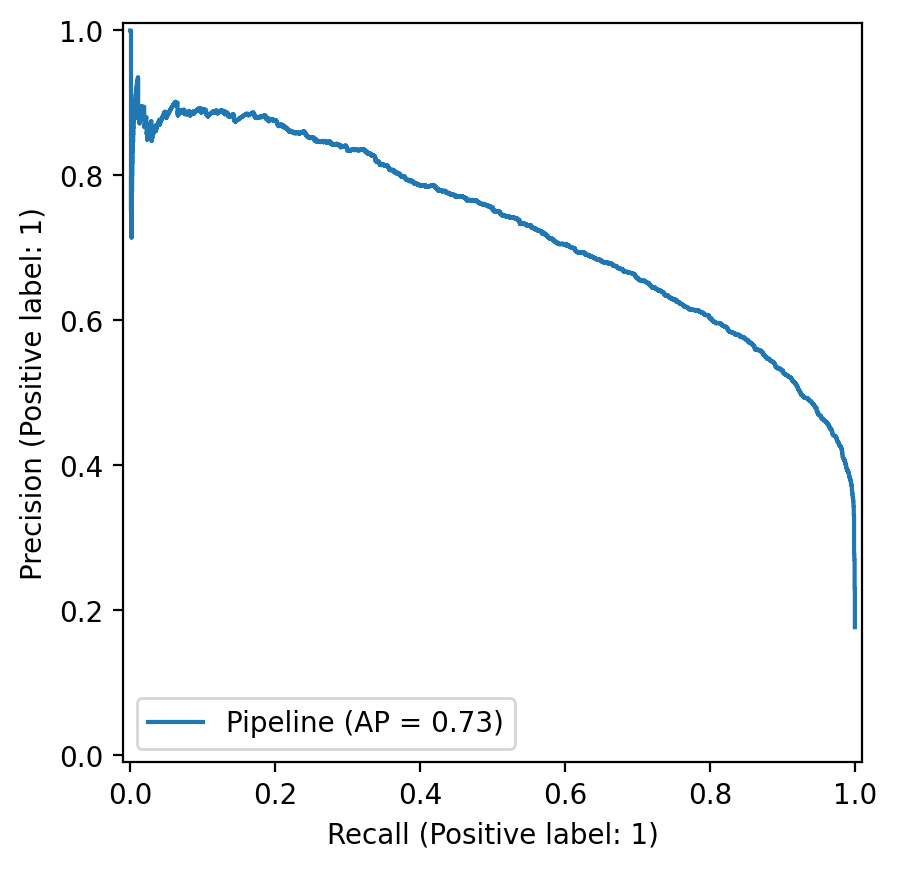

In [21]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(LR_best_model, X_test, target_pipeline.transform(y_test))

### Threshold Adjustment for Logistic Regression

Classification report: Training set
              precision    recall  f1-score   support

           0       0.95      0.88      0.92     28645
           1       0.60      0.80      0.69      6145

    accuracy                           0.87     34790
   macro avg       0.78      0.84      0.80     34790
weighted avg       0.89      0.87      0.88     34790

Classification report: Testing set
              precision    recall  f1-score   support

           0       0.95      0.88      0.92     12277
           1       0.60      0.80      0.69      2634

    accuracy                           0.87     14911
   macro avg       0.78      0.84      0.80     14911
weighted avg       0.89      0.87      0.88     14911

Best threshold = 0.57 with f1 score = 0.68


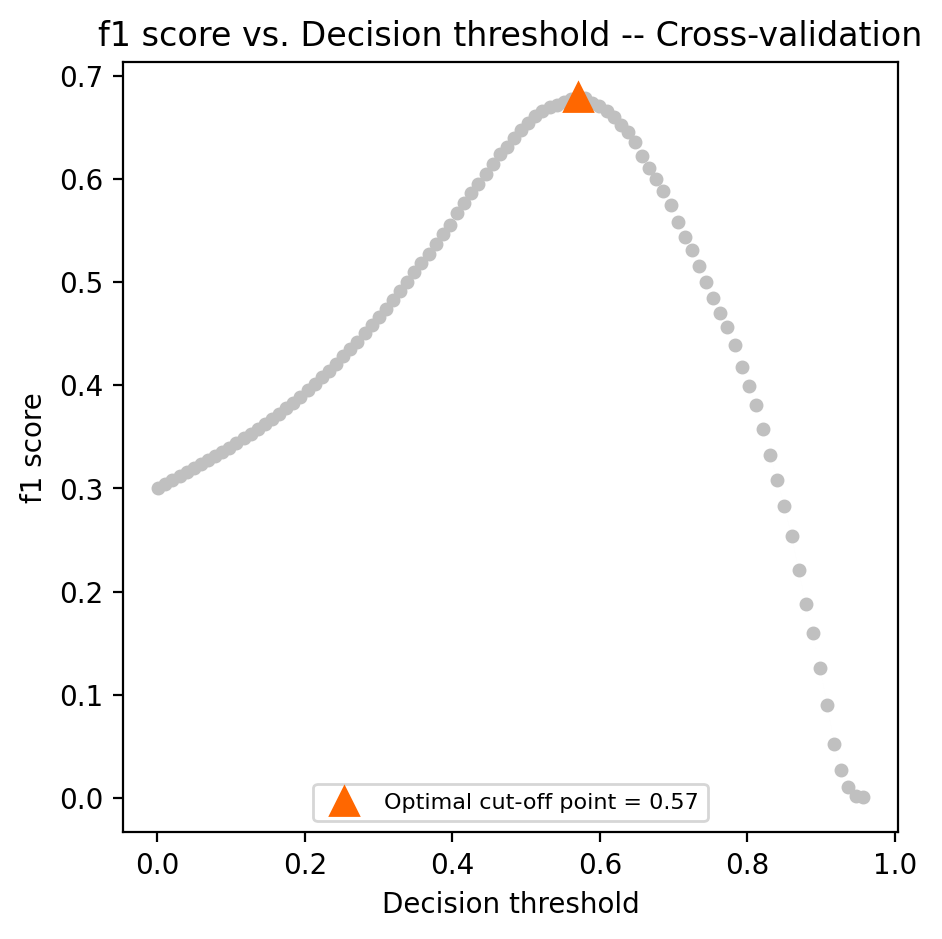

In [22]:
# Post tuning of selected best model (threshold adjustment as per business requirements)
lr_tuned, report = tune_model_threshold_adjustment(LR_best_model, X_train, y_train, X_test, y_test,scoring='f1',target_pipeline=target_pipeline)

In [23]:
# Feature Importance
feature_importance_df = pd.DataFrame({
    'feature': config.POST_FE_FEATURES,
    'importance': LR_best_model['base_model'].coef_[0]
}).sort_values('importance', ascending=False, key=abs)

feature_importance_df.style.set_table_styles(table_styles['cerulean_palette']).set_caption("LR Feature Importance")

,feature,importance
7,last_pymnt_amnt,-9.270420
3,loan_amnt,1.359272
31,sub_grade,1.000884
30,grade,0.960885
1,dti,0.800540
29,term,0.635961
88,title_credit card refinancing,0.132071
92,title_debt consolidation,0.128431
51,home_ownership_mortgage,-0.123493
33,verification_status,0.089890


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

RF_with_FE = Pipeline([
    ('feature_engineering_pipeline', selected_FE_with_FS),
    ('base_model', RandomForestClassifier())
])


RF_with_FE_CV = GridSearchCV(
    estimator=RF_with_FE,
    param_grid={
        'base_model__n_estimators': [120],
        'base_model__max_depth': [5],
        'base_model__min_samples_split': [9],
        'base_model__min_samples_leaf': [2],
        'base_model__criterion': ['entropy'],
        'base_model__warm_start': [True],
    },
    scoring='f1',
    cv=3,
    n_jobs=config.N_JOBS,
    verbose=True
)

RF_with_FE_CV.fit(X_train, y_train_transformed)
RF_best_model = RF_with_FE_CV.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                        Pipeline(steps=[('feature_engineering_pipeline',
                                                         FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                                                                         Pipeline(steps=[('all_numerical',
                                                                                                          FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                          Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                                                                           FunctionTransformer...
                                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                                                        min_frequency=0.001,
                                                                                                                        sparse_output=False))]))]))])),
                                       ('base_model',
                                        RandomForestClassifier())]),
             n_jobs=8,
             param_grid={'base_model__criterion': ['entropy'],
                         'base_model__max_depth': [5],
                         'base_model__min_samples_leaf': [2],
                         'base_model__min_samples_split': [9],
                         'base_model__n_estimators': [120],
                         'base_model__warm_start': [True]},
             scoring='f1', verbose=True)

Classification report: Training set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     28645
           1       0.60      0.87      0.71      6145

    accuracy                           0.88     34790
   macro avg       0.79      0.87      0.82     34790
weighted avg       0.90      0.88      0.88     34790

Classification report: Testing set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     12277
           1       0.59      0.87      0.71      2634

    accuracy                           0.87     14911
   macro avg       0.78      0.87      0.81     14911
weighted avg       0.90      0.87      0.88     14911

Best threshold = 0.22 with f1 score = 0.71


(TunedThresholdClassifierCV(cv=3,
                            estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                                       Pipeline(steps=[('feature_engineering_pipeline',
                                                                        FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                                                                                        Pipeline(steps=[('all_numerical',
                                                                                                                         FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                                         Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                                  

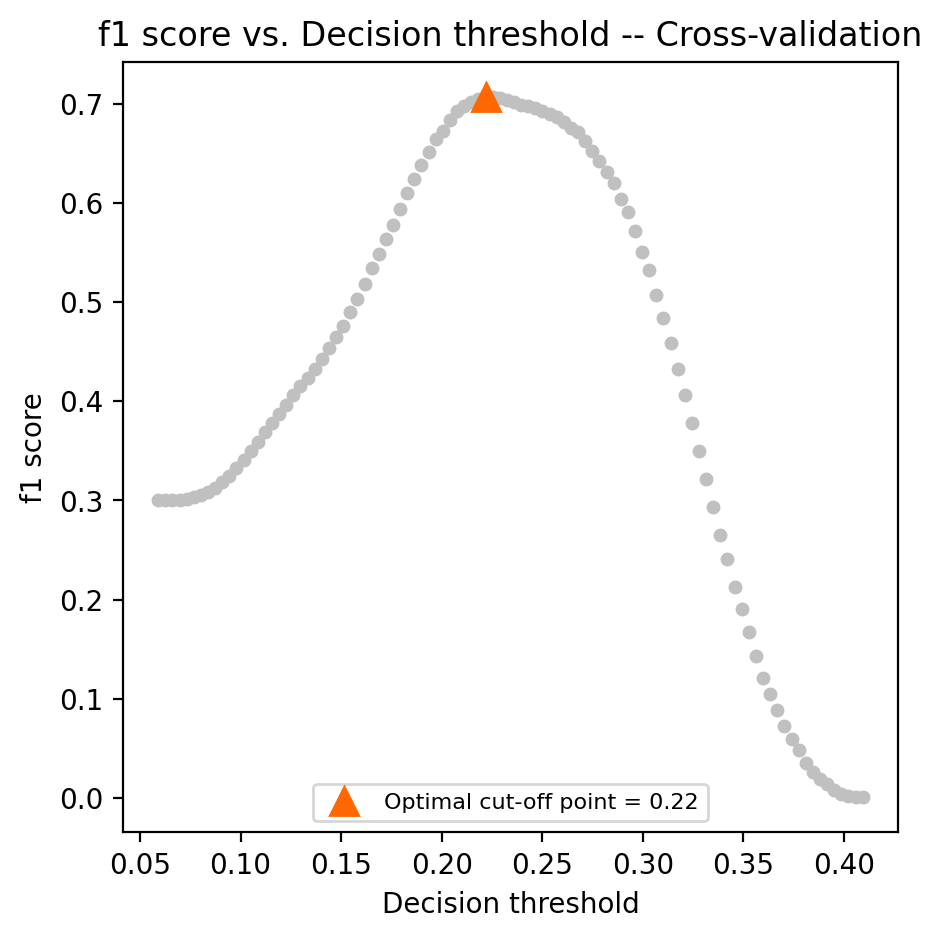

In [25]:
# Post tuning of selected best model (threshold adjustment as per business requirements)
tune_model_threshold_adjustment(RF_best_model, X_train, y_train, X_test, y_test,scoring='f1',target_pipeline=target_pipeline)

In [26]:
# Feature Importance
feature_importance_df = pd.DataFrame({
    'feature': config.POST_FE_FEATURES,
    'importance': RF_best_model['base_model'].feature_importances_
}).sort_values('importance', ascending=False, key=abs)

feature_importance_df.style.set_table_styles(table_styles['cerulean_palette']).set_caption("LR Feature Importance")

,feature,importance
7,last_pymnt_amnt,0.469936
30,grade,0.128366
31,sub_grade,0.094629
29,term,0.053124
0,annual_inc,0.034786
1,dti,0.030940
4,revol_util,0.021564
17,tot_cur_bal,0.015508
51,home_ownership_mortgage,0.015039
37,emp_title,0.013890


## Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

GBDT_with_FE = Pipeline([
    ('feature_engineering_pipeline', selected_FE_with_FS),
    ('base_model', GradientBoostingClassifier())
])


GBDT_with_FE_CV = GridSearchCV(
    estimator=GBDT_with_FE,
    param_grid={
        'base_model__n_estimators': [100],
        'base_model__learning_rate': [0.3],
        'base_model__subsample': [0.8],
        'base_model__max_depth': [5],
        'base_model__min_samples_split': [10],
        'base_model__min_samples_leaf': [4],
        'base_model__warm_start': [True],
    },
    scoring='f1',
    cv=3,
    n_jobs=config.N_JOBS,
    verbose=True
)

GBDT_with_FE_CV.fit(X_train, y_train_transformed)
GBDT_best_model = GBDT_with_FE_CV.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                        Pipeline(steps=[('feature_engineering_pipeline',
                                                         FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                                                                         Pipeline(steps=[('all_numerical',
                                                                                                          FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                          Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                                                                           FunctionTransformer...
                                                                                                                        sparse_output=False))]))]))])),
                                       ('base_model',
                                        GradientBoostingClassifier())]),
             n_jobs=8,
             param_grid={'base_model__learning_rate': [0.3],
                         'base_model__max_depth': [5],
                         'base_model__min_samples_leaf': [4],
                         'base_model__min_samples_split': [10],
                         'base_model__n_estimators': [100],
                         'base_model__subsample': [0.8],
                         'base_model__warm_start': [True]},
             scoring='f1', verbose=True)

Classification report: Training set
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     28645
           1       0.86      0.91      0.89      6145

    accuracy                           0.96     34790
   macro avg       0.92      0.94      0.93     34790
weighted avg       0.96      0.96      0.96     34790

Classification report: Testing set
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     12277
           1       0.73      0.82      0.77      2634

    accuracy                           0.91     14911
   macro avg       0.84      0.88      0.86     14911
weighted avg       0.92      0.91      0.92     14911

Best threshold = 0.43 with f1 score = 0.77


(TunedThresholdClassifierCV(cv=3,
                            estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                                       Pipeline(steps=[('feature_engineering_pipeline',
                                                                        FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                                                                                        Pipeline(steps=[('all_numerical',
                                                                                                                         FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                                         Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                                  

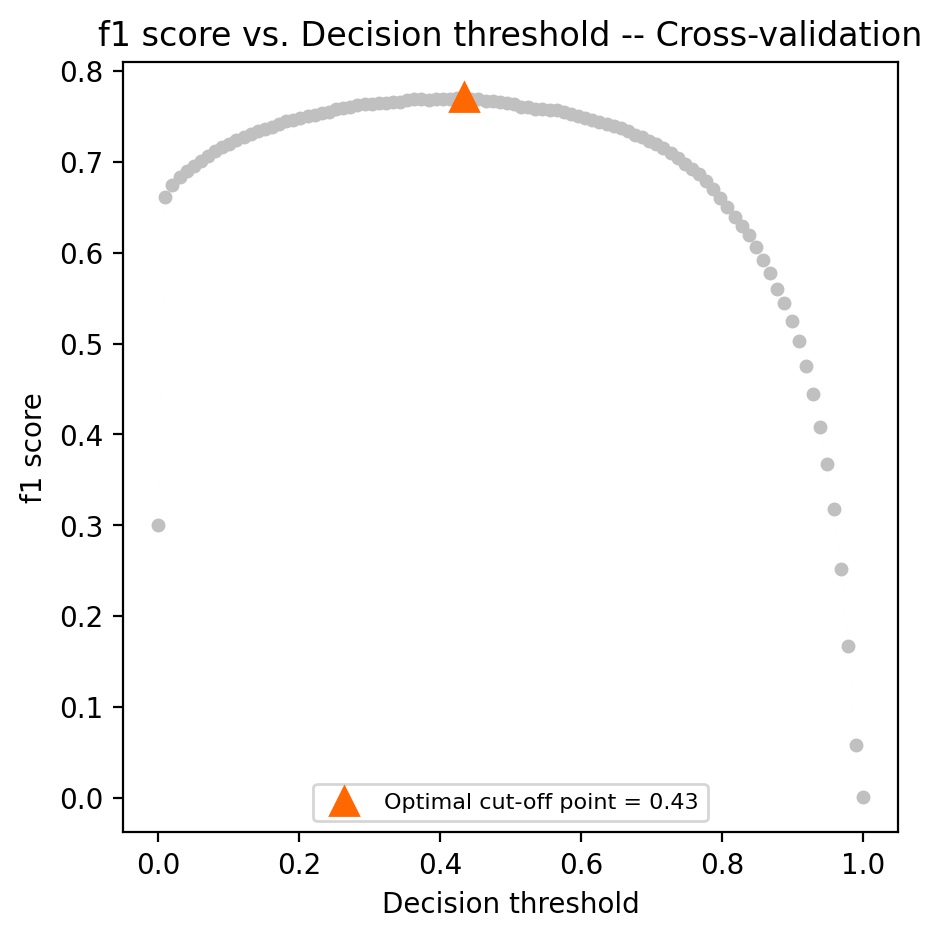

In [28]:
# Post tuning of selected best model (threshold adjustment as per business requirements)
tune_model_threshold_adjustment(GBDT_best_model, X_train, y_train, X_test, y_test,scoring='f1',target_pipeline=target_pipeline)

In [29]:
# Feature Importance DF
feature_importance_df = pd.DataFrame({
    'feature': config.POST_FE_FEATURES,
    'importance': GBDT_best_model['base_model'].feature_importances_
}).sort_values('importance', ascending=False, key=abs)

feature_importance_df.style.set_table_styles(table_styles['cerulean_palette']).set_caption("LR Feature Importance")

,feature,importance
7,last_pymnt_amnt,0.601981
29,term,0.064003
31,sub_grade,0.056491
3,loan_amnt,0.053323
16,tot_coll_amt,0.049745
30,grade,0.015818
1,dti,0.013825
15,total_rev_hi_lim,0.011389
0,annual_inc,0.011124
17,tot_cur_bal,0.010606


## XGBoost

In [30]:
from xgboost import XGBClassifier

XGB_with_FE = Pipeline([
    ('feature_engineering_pipeline', selected_FE_with_FS),
    ('base_model', XGBClassifier())
])


XGB_with_FE_CV = GridSearchCV(
    estimator=XGB_with_FE,
    param_grid={
        'base_model__max_depth': [5], 
        'base_model__learning_rate': [0.15],
        'base_model__n_estimators': [300], 
        'base_model__gamma': [0], 
        'base_model__subsample': [0.95], 
        'base_model__colsample_bytree': [0.95], 
        'base_model__lambda': [0.1],
        'base_model__tree_method': ["hist"],
        'base_model__eval_metric': ["aucpr"]
    },
    scoring='f1',
    cv=3,
    n_jobs=8,
    verbose=True
)

XGB_with_FE_CV.fit(X_train, y_train_transformed)
XGB_best_model = XGB_with_FE_CV.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                        Pipeline(steps=[('feature_engineering_pipeline',
                                                         FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                                                                         Pipeline(steps=[('all_numerical',
                                                                                                          FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                          Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                                                                           FunctionTransformer...
                                                      random_state=None, ...))]),
             n_jobs=8,
             param_grid={'base_model__colsample_bytree': [0.95],
                         'base_model__eval_metric': ['aucpr'],
                         'base_model__gamma': [0], 'base_model__lambda': [0.1],
                         'base_model__learning_rate': [0.15],
                         'base_model__max_depth': [5],
                         'base_model__n_estimators': [300],
                         'base_model__subsample': [0.95],
                         'base_model__tree_method': ['hist']},
             scoring='f1', verbose=True)

Classification report: Training set
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     28645
           1       0.84      0.97      0.90      6145

    accuracy                           0.96     34790
   macro avg       0.92      0.97      0.94     34790
weighted avg       0.97      0.96      0.96     34790

Classification report: Testing set
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     12277
           1       0.68      0.87      0.76      2634

    accuracy                           0.90     14911
   macro avg       0.82      0.89      0.85     14911
weighted avg       0.92      0.90      0.91     14911

Best threshold = 0.32 with f1 score = 0.76


(TunedThresholdClassifierCV(cv=3,
                            estimator=Pipeline(steps=[('feature_engineering_pipeline',
                                                       Pipeline(steps=[('feature_engineering_pipeline',
                                                                        FeatureUnion(transformer_list=[('numerical_combined_pipeline',
                                                                                                        Pipeline(steps=[('all_numerical',
                                                                                                                         FeatureUnion(transformer_list=[('numerical_skewed_pipeline',
                                                                                                                                                         Pipeline(steps=[('select_numerical_skewed_features',
                                                                                                                  

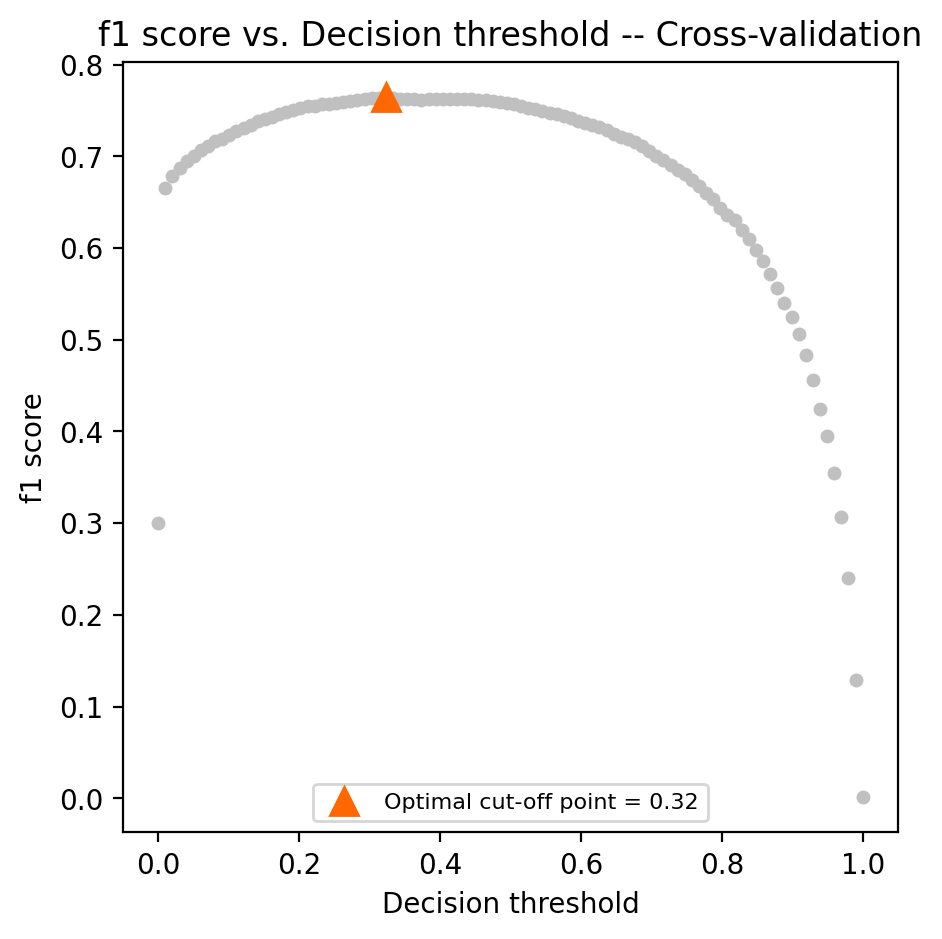

In [31]:
# Post tuning of selected best model (threshold adjustment as per business requirements)
tune_model_threshold_adjustment(XGB_best_model, X_train, y_train, X_test, y_test,scoring='f1',target_pipeline=target_pipeline)

In [32]:
# Feature Importance DF
feature_importance_df = pd.DataFrame({
    'feature': config.POST_FE_FEATURES,
    'importance': XGB_best_model['base_model'].feature_importances_
}).sort_values('importance', ascending=False, key=abs)

feature_importance_df.style.set_table_styles(table_styles['cerulean_palette']).set_caption("XGB Feature Importance")

,feature,importance
29,term,0.112627
7,last_pymnt_amnt,0.101394
16,tot_coll_amt,0.045166
31,sub_grade,0.020451
30,grade,0.017079
92,title_debt consolidation,0.015014
123,title_infrequent_sklearn,0.013453
3,loan_amnt,0.011806
88,title_credit card refinancing,0.010769
124,initial_list_status_f,0.010244


# Conclusion
* Best model is XGBoost with f1 score of 0.65 and least test and training time.
* Most important feature is `zipcode` with from address followed by `grade` and `term`

In [33]:
# throw error to stop run all in notebook
raise SystemExit

SystemExit: 

/home/jyothisable/.cache/pypoetry/virtualenvs/loantap-credit-default-risk-model-jHkJKmkd-py3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



# Other scripts

Run MLFlow UI in browser

In [ ]:
# Run MLFlow UI in browser - default serve port is 5000
!poetry mlflow ui # localhost:5000

Run experiment from MLFlow project file

In [ ]:
# Run MLFlow from MLProject file
!poetry run mlflow run . --experiment-name 'Model Optuna Optimization'

Serve APIs with MLFlow

In [ ]:
# serve any model
!poetry run mlflow models serve -m ./mlruns/962701371541841446/ff8f948e9838413f9ea1d5c956fda683/artifacts/model --port 5002 --no-conda localhost:5002

# serve models from registry
!poetry run mlflow models serve -m "models:/XGB prediction model@best" --port 5002 --no-conda # localhost:5002

Serve API via FastAPI

In [ ]:
!poetry run python fastapi_app.py # post to localhost:8000/predict, /doc in browser for documentation

Run streamlit app

Live: https://loantap-loan-prediction.streamlit.app/

In [ ]:
!poetry run streamlit run streamlit_app.py # local

Run Flask app

In [ ]:
!poetry run python flask_app.py # localhost:8080

Docker script

In [ ]:
!docker buildx build --tag loantap_api2 . # build from root of repo
!docker run -p 8000:8000 loantap_api2 # run locally